In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 19

@author: yaning
"""

import pickle
# import torch
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd

In [3]:
path = "/home/yaning/Documents/"
with open(path + "Spiking_add_files/validate_maps_0_9_new_peak.pkl", "rb") as f:
    maps = pickle.load(f)

In [34]:
output

'nohup: ignoring input\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%)\nProgress: 3000/4000 (75.0%)\nProgress: 0/4000 (0.0%)\nProgress: 1000/4000 (25.0%)\nProgress: 2000/4000 (50.0%

In [4]:
num = 0
missing_idx = []
with open("0_9_new_peak_output.log", "r") as f:
    for line in f:
        clean_line = line.strip()
        if clean_line == "Progress: 0/4000 (0.0%)":
            num += 1
        elif clean_line == "oops":
            missing_idx.append(num)

In [6]:
num

14

In [5]:
missing_idx

[9]

In [7]:
for i in range(len(missing_idx)):
    missing_idx[i] = missing_idx[i] - 1

In [4]:
len(maps)

91

In [8]:
with open(path + "Spiking_NN/datasets/mnst_30_hunni.pkl", "rb") as f:
    tags = pickle.load(f)

In [9]:
tags = tags['tag']

In [10]:
tags.shape

(100,)

In [11]:
tags = np.delete(tags, missing_idx)

In [12]:
binary_maps = []
for i in maps:
    temp = (i != 0).astype(int)
    binary_maps.append(temp)

In [13]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap([plt.cm.YlGnBu(0.0), plt.cm.YlGnBu(0.8)])

In [132]:
# only get the nines and zeros
nine_idx = np.where(tags == 9)[0]
zero_idx = np.where(tags == 0)[0]

In [136]:
zero_idx.shape

(16,)

In [134]:
nine_maps = []
for i in nine_idx:
    nine_maps.append(binary_maps[i])

In [135]:
zero_maps = []
for i in zero_idx:
    zero_maps.append(binary_maps[i])

In [139]:
len(zero_maps)

16

In [14]:
len(maps)

10

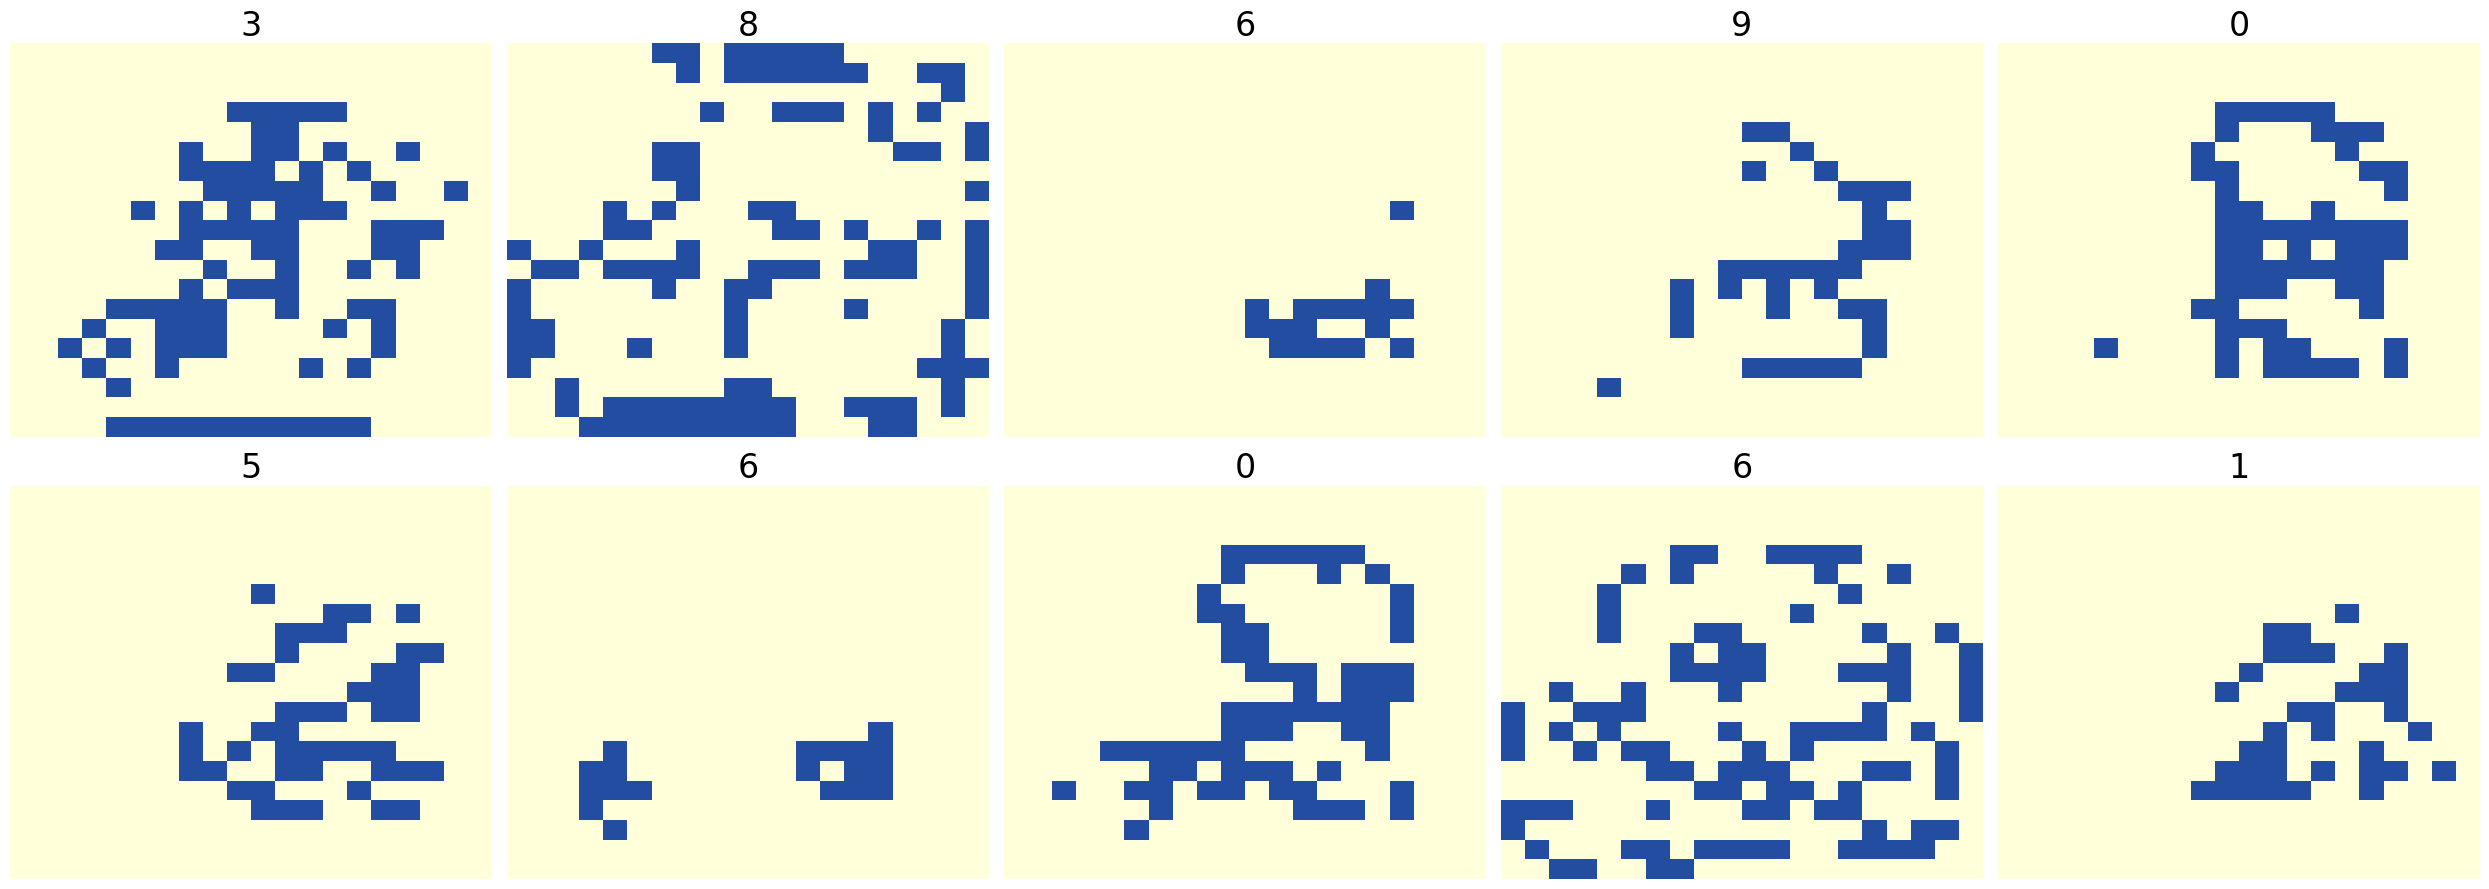

In [15]:
fig, axes = plt.subplots(2,5, figsize=(25,9))
axes = axes.flatten()

for i in range(10):

    sns.heatmap(binary_maps[i], annot=False, cmap=cmap, cbar=False, ax=axes[i], linewidths=0)
    axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

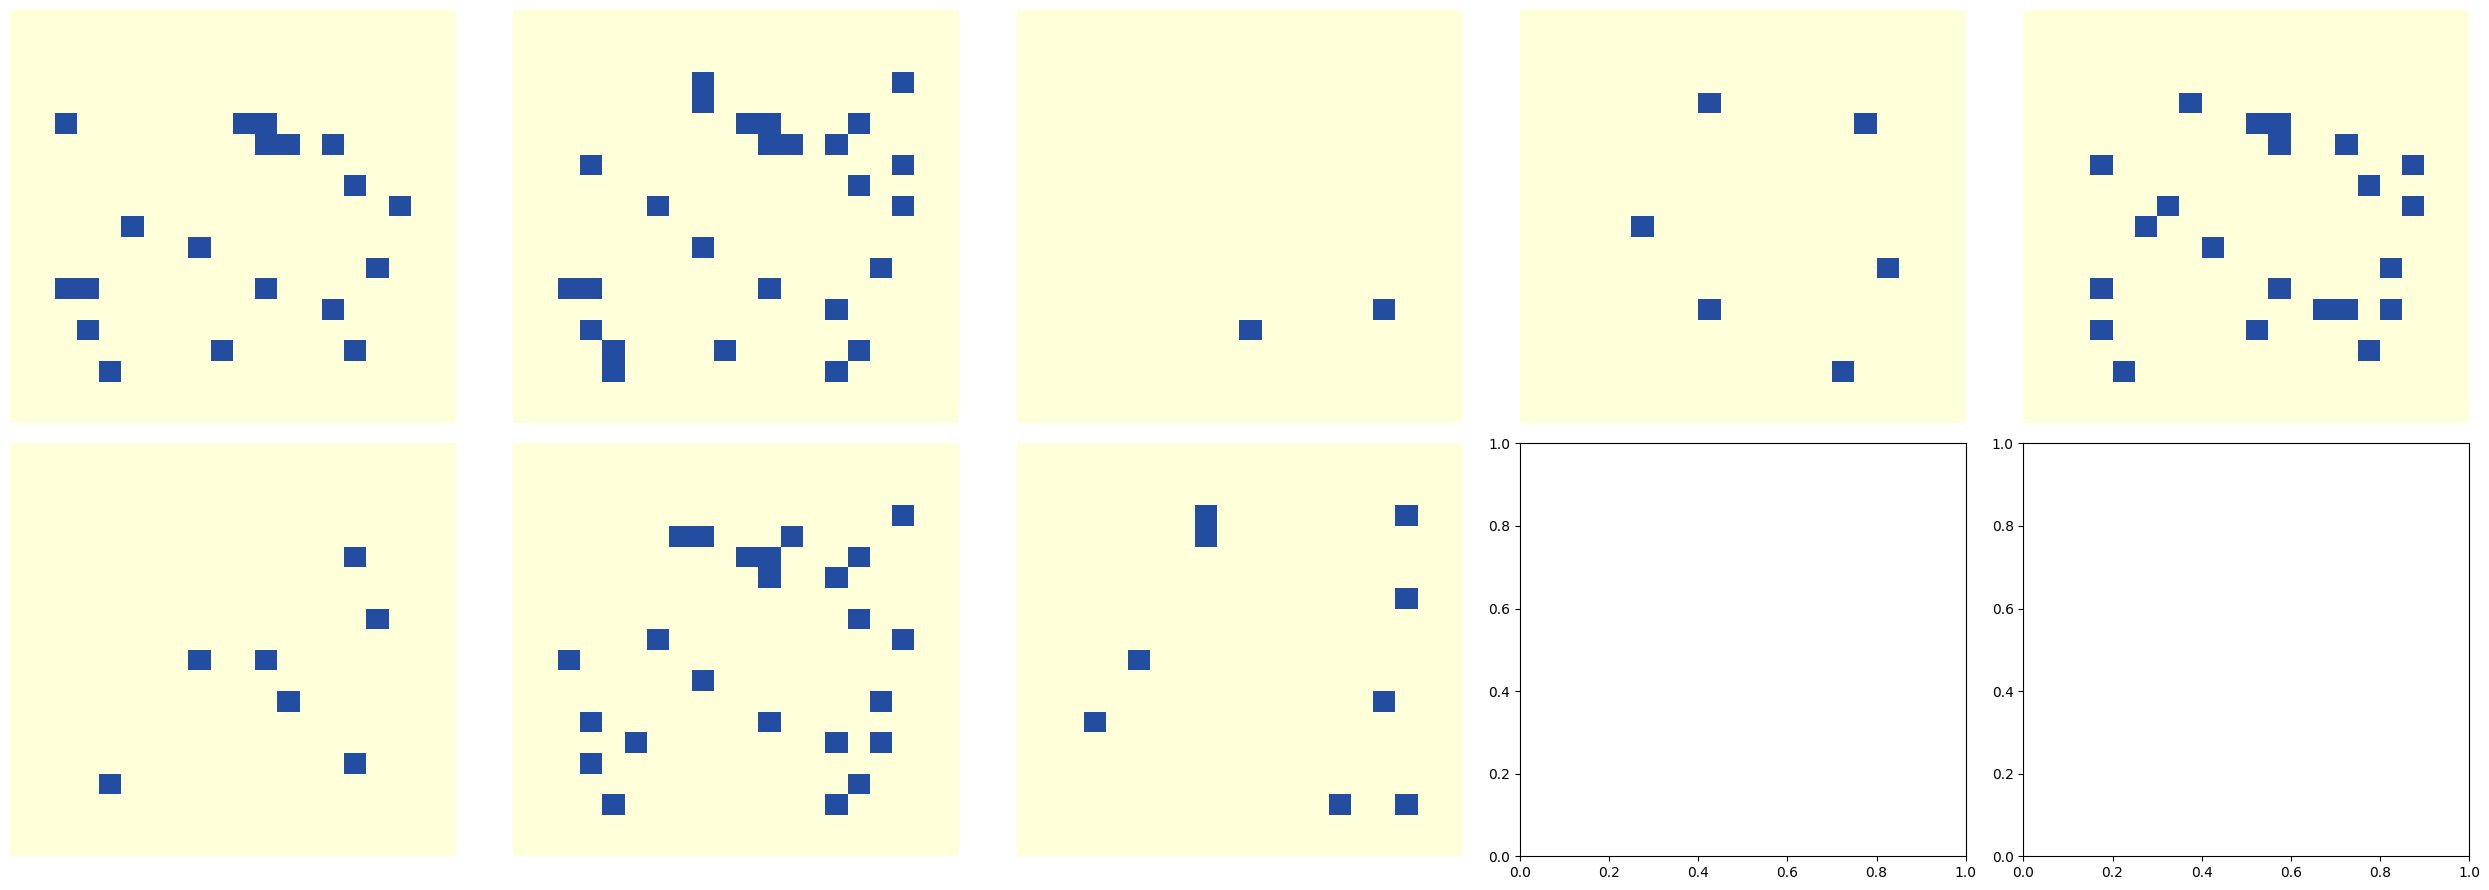

In [137]:
fig, axes = plt.subplots(2,5, figsize=(25,9))
axes = axes.flatten()

for i in range(nine_idx.shape[0]):

    sns.heatmap(nine_maps[i], annot=False, cmap=cmap, cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

IndexError: index 15 is out of bounds for axis 0 with size 15

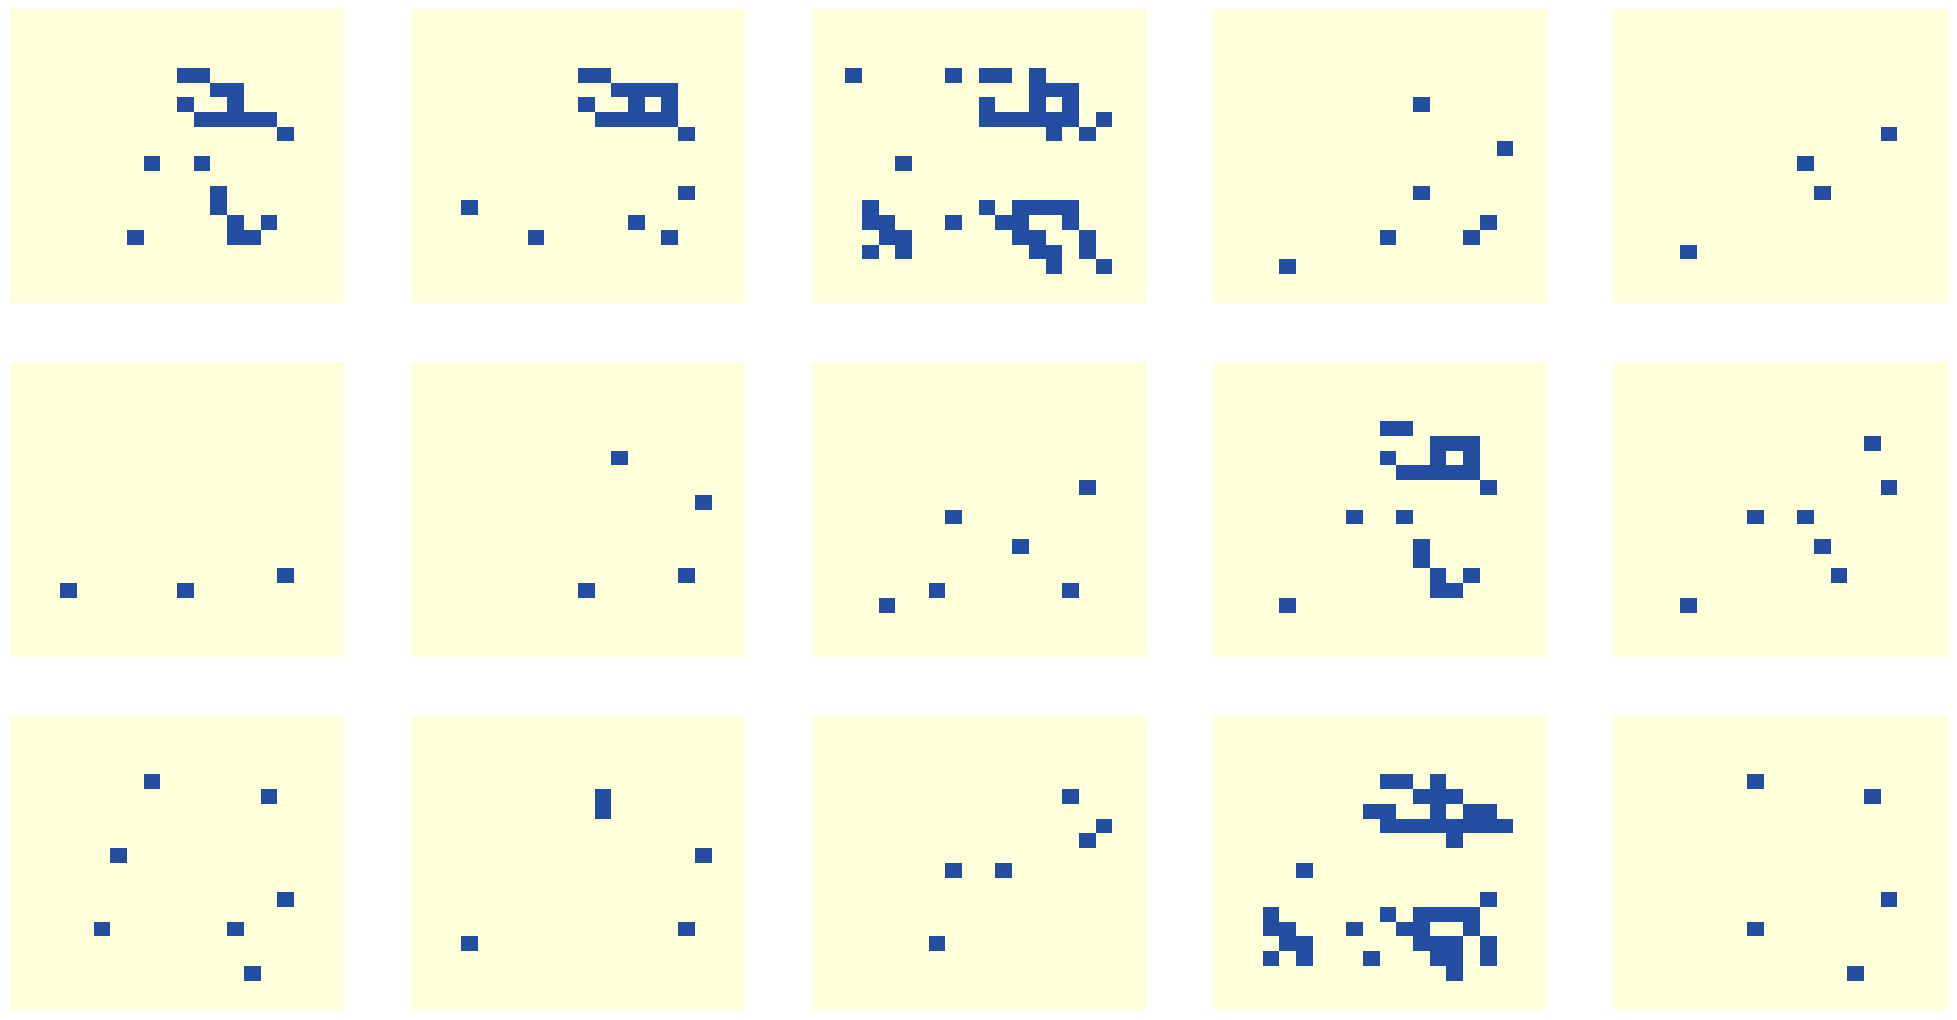

In [138]:
fig, axes = plt.subplots(3,5, figsize=(25,13))
axes = axes.flatten()

for i in range(zero_idx.shape[0]):

    sns.heatmap(zero_maps[i], annot=False, cmap=cmap, cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

<Axes: >

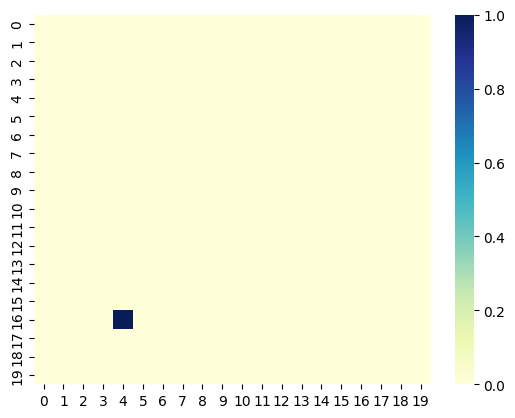

In [21]:
sns.heatmap(maps[14], annot=False, cmap="YlGnBu")